## Stanford University Summer 2024
## DataSCi 112: Principles of Data Science

# Team Project


**Discussion Section**: DIS06

**Name:** Bruna Alves Maziero
**Stanford Email:** bmaziero@stanford.edu

**Name:** Gunjan Siddharth
**Stanford Email:** gunjan03@stanford.edu

**Name:** Ho Shing Louis Lau
**Stanford Email:** louislau@stanford.edu

This project is aimed at testing different models in predicting the price and categories of health insurance policies of 1,000,000 people based on 12 features. Our dataset can be found at https://www.kaggle.com/datasets/sridharstreaks/insurance-data-for-machine-learning

###Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score

In [ ]:

url='https://drive.google.com/file/d/1oU3fmr-D7WSJp6w4mkjCWKoEaIGu92MQ/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_original = pd.read_csv(url)
df_original

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,NaN,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,NaN,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


In [ ]:
df = df_original.sample(frac=0.5, random_state=42)

**Reminder:**

- Define common variables
- Define common functions

# Let us explore the dataset (Exploratory Data Analysis)

In [ ]:
df.shape[0], df.shape[1]

(500000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 987231 to 821380
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     500000 non-null  int64  
 1   gender                  500000 non-null  object 
 2   bmi                     500000 non-null  float64
 3   children                500000 non-null  int64  
 4   smoker                  500000 non-null  object 
 5   region                  500000 non-null  object 
 6   medical_history         374690 non-null  object 
 7   family_medical_history  374595 non-null  object 
 8   exercise_frequency      500000 non-null  object 
 9   occupation              500000 non-null  object 
 10  coverage_level          500000 non-null  object 
 11  charges                 500000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 49.6+ MB


In [ ]:
df.describe()

,age,bmi,children,charges
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,41.510310,34.001505,2.498256,16738.977307
std,13.854954,9.225131,1.708284,4412.728797
min,18.000000,18.000000,0.000000,3445.011643
25%,30.000000,26.020000,1.000000,13602.763055
50%,42.000000,34.000000,2.000000,16630.010043
75%,53.000000,41.980000,4.000000,19785.887132
max,65.000000,50.000000,5.000000,32495.068400


In [ ]:
#find null values in each column
df.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
medical_history,125310
family_medical_history,125405
exercise_frequency,0
occupation,0


In [ ]:
#handle missing values in the two columns
df['medical_history'] = df['medical_history'].fillna('No records')
df['family_medical_history'] = df['family_medical_history'].fillna('No records')

We will have to one-hot encode the categorical features

In [ ]:
#Create the OneHotEncoder columns from original data frame
ct = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level']),
    remainder='passthrough')
df01 = ct.fit_transform(df)
df01 = pd.DataFrame(df01, columns=ct.get_feature_names_out())
df01

,onehotencoder__gender_female,onehotencoder__gender_male,onehotencoder__smoker_no,onehotencoder__smoker_yes,onehotencoder__region_northeast,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest,onehotencoder__medical_history_Diabetes,onehotencoder__medical_history_Heart disease,...,onehotencoder__occupation_Student,onehotencoder__occupation_Unemployed,onehotencoder__occupation_White collar,onehotencoder__coverage_level_Basic,onehotencoder__coverage_level_Premium,onehotencoder__coverage_level_Standard,remainder__age,remainder__bmi,remainder__children,remainder__charges
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,38.0,21.03,0.0,13889.333131
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,35.0,29.93,1.0,20748.019914
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,32.0,21.21,1.0,17329.283112
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,21.0,21.81,0.0,14832.471656
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,38.0,46.88,1.0,18885.339524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,39.0,35.56,1.0,22962.188748
499996,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,62.0,23.12,4.0,13672.484782
499997,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,26.0,29.90,1.0,16472.746761
499998,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,28.0,46.26,5.0,9564.559623


**EDA 1: What is the average amount of payment grouped by age, gender and occupation for the premium / standard / basic coverage level?**

<ipython-input-10-df8d16d033c5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df02.groupby(['age_group'])['charges'].mean().plot.line()


<Axes: xlabel='age_group'>

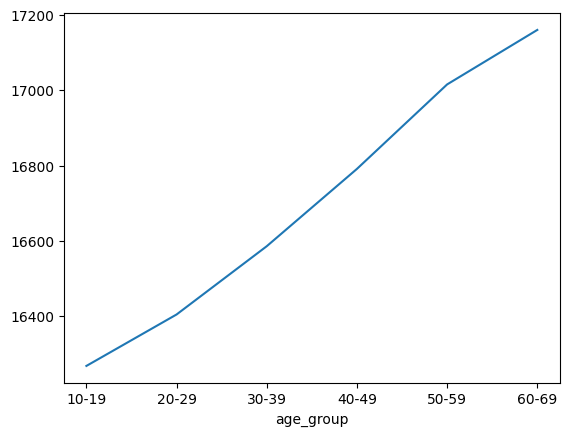

In [ ]:
df02=df.copy()
df02["age_group"] = pd.cut(x = df["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80],
                         labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"], right = False)
df02.groupby(['age_group'])['charges'].mean().plot.line()

<Axes: xlabel='gender'>

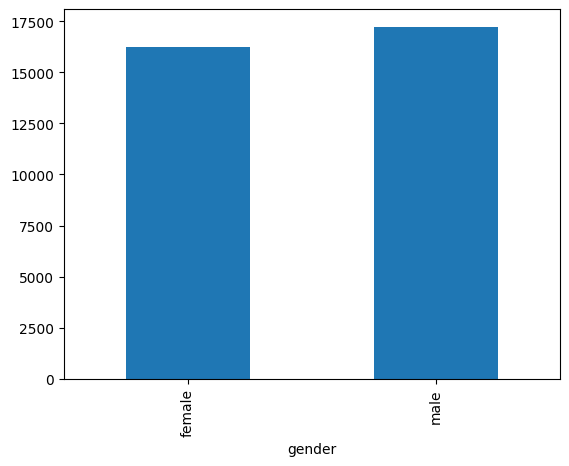

In [ ]:
df.groupby(['gender'])['charges'].mean().plot.bar()

<Axes: xlabel='occupation'>

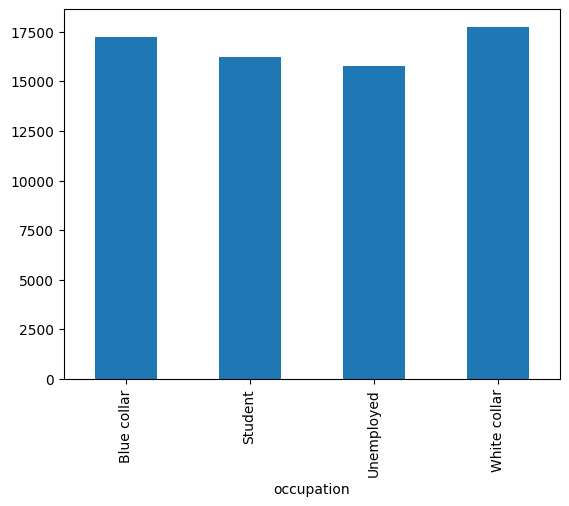

In [ ]:
df.groupby(['occupation'])['charges'].mean().plot.bar()

<Axes: xlabel='medical_history'>

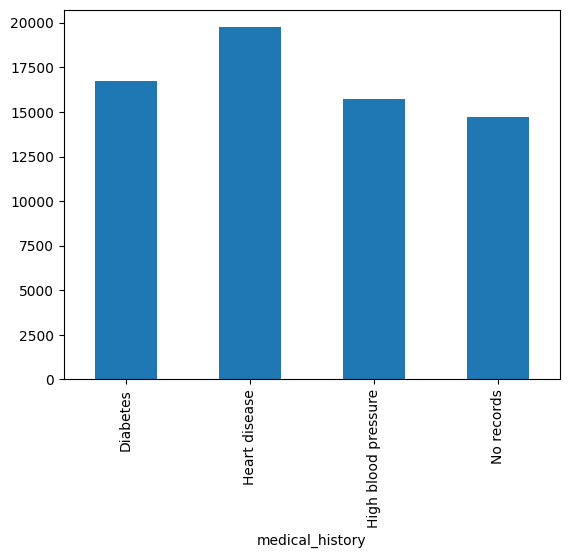

In [ ]:
df.groupby(['medical_history'])['charges'].mean().plot.bar()

**Interpretation:** From the preliminary analysis above, it appears that advanced age, male gender, occupation of white collar and background heart disease are associated with higher insurance charges.

**EDA 2: Is the medical history (heart disease) related to age, gender, BMI, smoking, exercise, or family history? Which factor has the strongest association?**

In [ ]:
correlations = df01.corrwith(df01['onehotencoder__medical_history_Heart disease'])  #calculates the correlation
(correlations).sort_values(ascending=False)

,0
onehotencoder__medical_history_Heart disease,1.000000
remainder__charges,0.391860
onehotencoder__occupation_Unemployed,0.002399
onehotencoder__coverage_level_Basic,0.002135
remainder__age,0.001392
onehotencoder__occupation_Student,0.001342
onehotencoder__smoker_no,0.001295
onehotencoder__exercise_frequency_Rarely,0.001176
onehotencoder__region_southeast,0.001083
onehotencoder__gender_male,0.001035


**Interpretation:** From the observations above,
* Heart disease has positively correlation with the insurance charges.
* Patients with high blood pressure and diabetes are less prone to heart diseases, as shown by the negative correlation of -0.3.

**EDA 3: Which factor affects the insurance charges most?**

In [ ]:
correlations = df01.corrwith(df01['remainder__charges'])  #calculates the correlation
abs(correlations).sort_values(ascending=False)  #we can view the absolute values of the correlations to see which features are most significanty related to charges.

,0
remainder__charges,1.000000
onehotencoder__smoker_no,0.566168
onehotencoder__smoker_yes,0.566168
onehotencoder__coverage_level_Premium,0.427222
onehotencoder__family_medical_history_Heart disease,0.391868
onehotencoder__medical_history_Heart disease,0.391860
onehotencoder__coverage_level_Basic,0.375501
onehotencoder__medical_history_No records,0.262113
onehotencoder__family_medical_history_No records,0.261736
onehotencoder__exercise_frequency_Frequently,0.146654


**Interpretation:** From the above analysis, smoking status has the strongest association with insurance charges (correlation 0.566), followed by family history of heart disease (correlation 0.393) and medical history of heart disease (correlation 0.392).

The smoking status has the highest correlation with charges.

Let us visualize this.

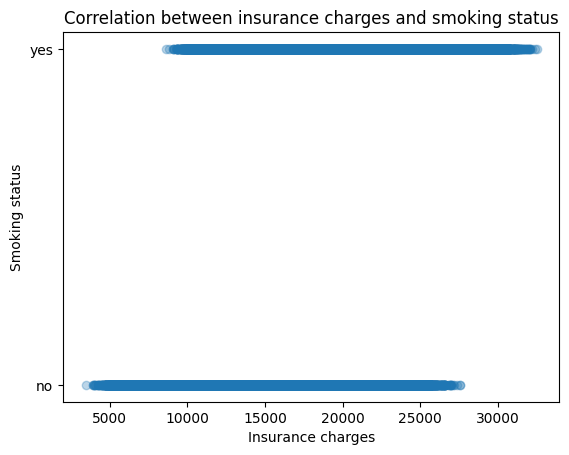

In [ ]:
# Visualization

fig01 = plt.figure()

plt.scatter(x = df['charges'], y = df['smoker'], alpha = 0.3)
plt.title('Correlation between insurance charges and smoking status')
plt.xlabel('Insurance charges')
plt.ylabel('Smoking status')

plt.show()

# Q1: Which features are the most critical in determining insurance pricing?

First, we will perform an univariate analysis to determine the effect of each independent variable. Next, we will perform a forward stepwise regression to start with a null model, followed by additional variables to improve the predictive ability of our model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df["charges"], test_size=0.20, random_state=41)

In [ ]:
# define the features and their respective transformers
features = {
    'age': StandardScaler(),
    'bmi': StandardScaler(),
    'children': StandardScaler(),
    'gender': OneHotEncoder(sparse_output=False),
    'smoker': OneHotEncoder(sparse_output=False),
    'region': OneHotEncoder(sparse_output=False),
    'medical_history': OneHotEncoder(sparse_output=False),
    'family_medical_history': OneHotEncoder(sparse_output=False),
    'exercise_frequency': OneHotEncoder(sparse_output=False),
    'occupation': OneHotEncoder(sparse_output=False),
    'coverage_level': OneHotEncoder(sparse_output=False)
}

results = {}

# loop to train univariate models
for feature, transformer in features.items():
    ct = make_column_transformer((transformer, [feature]), remainder='drop')
    pipeline = make_pipeline(ct, LinearRegression())
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    results[feature] = (train_rmse, test_rmse)


results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Train RMSE', 'Test RMSE']).sort_values(by='Test RMSE')
results_df

,Train RMSE,Test RMSE
smoker,3636.418466,3641.236240
coverage_level,3901.352196,3909.989631
medical_history,3996.930738,3994.870801
family_medical_history,3996.558782,4002.366830
occupation,4341.668692,4343.134122
exercise_frequency,4349.883854,4351.497125
gender,4383.479315,4389.663941
bmi,4387.915162,4392.436851
children,4398.989109,4402.541786
region,4401.015846,4405.779376


**Interpretation:**

As we can observe from above, the root mean squared error (RMSE) was lowest in univariate linear models of i) smoker (3633.4), ii) coverage level (3909.4), iii) family medical history (3988.1), iv) medical history (3989.8) and v) occupation (4338.4).

However, as coverage level is actually derived from the final charges. We therefore decide that it should not be included in the final predictive model.

Therefore, we pick i) smoker status, ii) family medical history, iii) personal medical history and iv) occupation as the most important 4 factors associated with the insurance charges.

Next, we are going to test the potential combinations among all 10 to see if the predictive power can be improved.

In [ ]:
candidate_features = ['age', 'gender', 'bmi','children','smoker','region', 'family_medical_history', 'medical_history', 'exercise_frequency','occupation']

In [ ]:
ct2 = make_column_transformer(
    (StandardScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(sparse_output=False, drop='first'), ['gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation']),
    remainder='passthrough')

df03 = df[['age', 'gender', 'bmi','children','smoker','region', 'family_medical_history', 'medical_history', 'exercise_frequency','occupation']]
transformed_df = ct2.fit_transform(df03)
transformed_df = pd.DataFrame(transformed_df, columns=ct2.get_feature_names_out())
transformed_df

,standardscaler__age,standardscaler__bmi,standardscaler__children,onehotencoder__gender_male,onehotencoder__smoker_yes,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest,onehotencoder__medical_history_Heart disease,onehotencoder__medical_history_High blood pressure,onehotencoder__medical_history_No records,onehotencoder__family_medical_history_Heart disease,onehotencoder__family_medical_history_High blood pressure,onehotencoder__family_medical_history_No records,onehotencoder__exercise_frequency_Never,onehotencoder__exercise_frequency_Occasionally,onehotencoder__exercise_frequency_Rarely,onehotencoder__occupation_Student,onehotencoder__occupation_Unemployed,onehotencoder__occupation_White collar
0,-0.253362,-1.406107,-1.462437,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.469891,-0.441350,-0.877054,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.686420,-1.386595,-0.877054,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-1.480361,-1.321555,-1.462437,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.253362,1.396024,-0.877054,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,-0.181185,0.168940,-0.877054,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
499996,1.478873,-1.179551,0.879096,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
499997,-1.119479,-0.444602,-0.877054,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
499998,-0.975126,1.328817,1.464479,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


Let us evaluate the Linear Regression model on every combination of the 10 features and find the optimal set of features.

In [ ]:
from tqdm import tqdm

# Get the new feature names after transformation
new_feature_names = ct2.get_feature_names_out()

# Create a dictionary to map original feature names to their transformed versions
feature_map = {}
for feature in candidate_features:
    feature_map[feature] = [col for col in new_feature_names if feature in col]

mse = {}
for size in tqdm(range(1, len(candidate_features) + 1), desc="Feature Combinations"):
    for features in tqdm(combinations(candidate_features, size)):
        feature_string = ",".join(features)
        selected_columns = [col for feature in features for col in feature_map[feature]]
        mse[feature_string] = - cross_val_score(
            LinearRegression(),
            X=transformed_df[selected_columns],
            y=df['charges'],
            scoring="neg_mean_squared_error",
            cv=5).mean()

mse_sorted = pd.Series(mse).sort_values(ascending=False)
print(mse_sorted)

Feature Combinations:   0%|          | 0/10 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  4.72it/s]
2it [00:00,  4.44it/s]
3it [00:00,  4.63it/s]
4it [00:00,  4.74it/s]
5it [00:01,  4.56it/s]
6it [00:01,  3.09it/s]
7it [00:02,  2.84it/s]

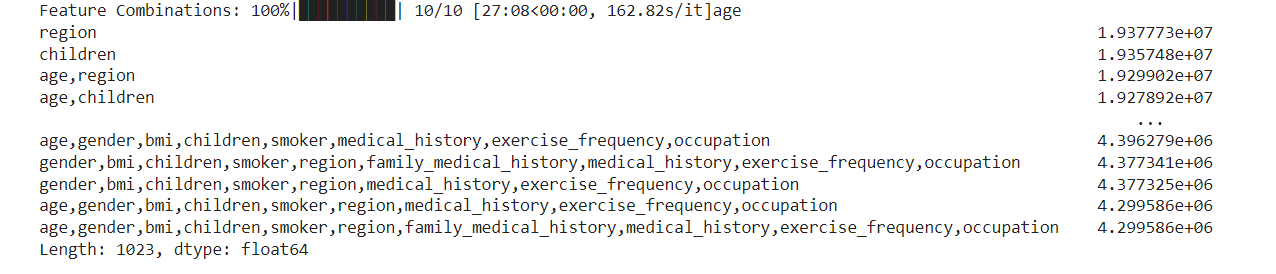

From the above cross validation for all possible combinations of the 10 features on Linear Regression, we find that [age, gender, bmi, children, smoker, region, medical_history, family_medical_history, exercise_frequency, occupation] when taken together give the lowest Mean Squared Error. (Still a pretty high MSE value, though.)


In [ ]:
candidate_features = ['smoker', 'family_medical_history', 'medical_history','occupation']
pipeline03 = make_pipeline(
    OneHotEncoder(),
    LinearRegression())

accuracies = {}
for size in range(1, len(candidate_features) + 1):
  for features in combinations(candidate_features, size):
    feature_string = ",".join(features)

    accuracies[feature_string] = cross_val_score(
        pipeline03,
        X=df[list(features)], y=df["charges"],
        scoring="neg_mean_squared_error",
        cv=10).mean()

accuracies_sorted = pd.Series(accuracies).sort_values(ascending = False)
accuracies_sorted

,0
"smoker,family_medical_history,medical_history,occupation",-5.591154e+06
"smoker,family_medical_history,medical_history",-6.226713e+06
"smoker,medical_history,occupation",-9.093159e+06
"smoker,family_medical_history,occupation",-9.094991e+06
"smoker,family_medical_history",-9.721599e+06
"smoker,medical_history",-9.724473e+06
"family_medical_history,medical_history,occupation",-1.186093e+07
"family_medical_history,medical_history",-1.249341e+07
"smoker,occupation",-1.260818e+07
smoker,-1.323056e+07


**Interpretation:**

We performed a cross validation score on negative mean squared error among the possible combinations of 4 candidate features (smoker, family medical history, medical history, occupation).

After assessment, the 4-parameter multivariate model performs the best, followed by the 3-parameter multivariate model (smoker + family medical history + medical history).

Therefore, our results show that 'smoking status' is the single most critical factor determining the insurance price, which echoes our previous exploratory data analysis (the parameter with highest correlation).

On the other hand, we also demonstrate that combining multiple variables will improve the overall performance. Next, we will work on developing an optimal predictive model by machine learning.

# Q2: What is the predicted price of insurance given the different characteristics of a patient? How does Linear Regression and K Nearest Neighbors compare in terms of predicting insurance charges, and which model performs the best?

Based on Exercise 1, Exercise 2 seems to aim at building and comparing predictive models to estimate insurance charges, with specific attention to:

- Implementing Linear Regression and K-Nearest Neighbors (KNN) models.
- Comparing the performance of these models.
- Predicting insurance prices based on the different characteristics of a patient.

In [ ]:
features = ['age', 'gender', 'bmi', 'children', 'smoker', 'region',
            'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation']
X = df[features]
y = df['charges']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(drop='first'), ['gender', 'smoker', 'region',
                                              'medical_history', 'family_medical_history',
                                              'exercise_frequency', 'occupation'])
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# Create and train the Linear Regression model
lin_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', LinearRegression())])

lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lr

4296767.294884587

In [ ]:
# Create and train the KNN model
knn_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', KNeighborsRegressor(n_neighbors=5))])

knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_knn

5250079.903942363

# 3. Analytical Question: Classify the insurance type (Premium, Standard, Basic) based on different characteristics without knowing the charges.


In [ ]:
df['coverage_level'].value_counts().sort_index()

,count
coverage_level,
Basic,166245
Premium,166486
Standard,167269


The dataset has a balanced number of classes.

In [ ]:
y = df['coverage_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred, target_names=['Premium', 'Standard', 'Basic'])
print("Classification Report:\n", report)


Accuracy: 0.33165
Classification Report:
               precision    recall  f1-score   support

     Premium       0.33      0.46      0.39     33288
    Standard       0.33      0.33      0.33     33218
       Basic       0.33      0.21      0.25     33494

    accuracy                           0.33    100000
   macro avg       0.33      0.33      0.32    100000
weighted avg       0.33      0.33      0.32    100000



* The model's performance is suboptimal with an accuracy of around 33.2%. This suggests that the model is not effectively distinguishing between the coverage levels. Eg: Precision: 0.33 - of all instances predicted as Premium, 33% are actually Premium. Recall: 0.46 - Of all actual Premium instances, 46% were correctly predicted. Recall measures how well the model identifies positive instances.
* Precision, recall, and F1-Scores are all quite low across the classes, particularly for the Basic class, which indicates issues with identifying this class.

# 4. Analytical Question: Can we identify distinct clusters of insurance prices based on policyholders’ health and demographic characteristics? What are the defining features of each cluster?

In [ ]:
# Compute cluster purity
def cluster_purity(true_labels, cluster_labels):
    df = pd.DataFrame({'true': true_labels, 'cluster': cluster_labels})
    purity = df.groupby('cluster').apply(lambda x: x['true'].mode().size).sum() / len(true_labels)
    return purity


In [ ]:
# df01 contains one-hot encoded categorical fetaures and all other features
#selecting all except 'charge' column
df04 = df01[df01.columns[0:29]]
model = KMeans(n_clusters=3, init = 'random', n_init=5, random_state = 100)
model.fit(df04)
cluster = model.labels_
pd.Series(cluster).value_counts().sort_index()

,count
0,139056
1,138828
2,222116


In [ ]:
purity = cluster_purity(df['coverage_level'], clusters)
print(f'Cluster Purity: {purity}')


Cluster Purity: 6e-06


Text(0, 0.5, 'BMI')

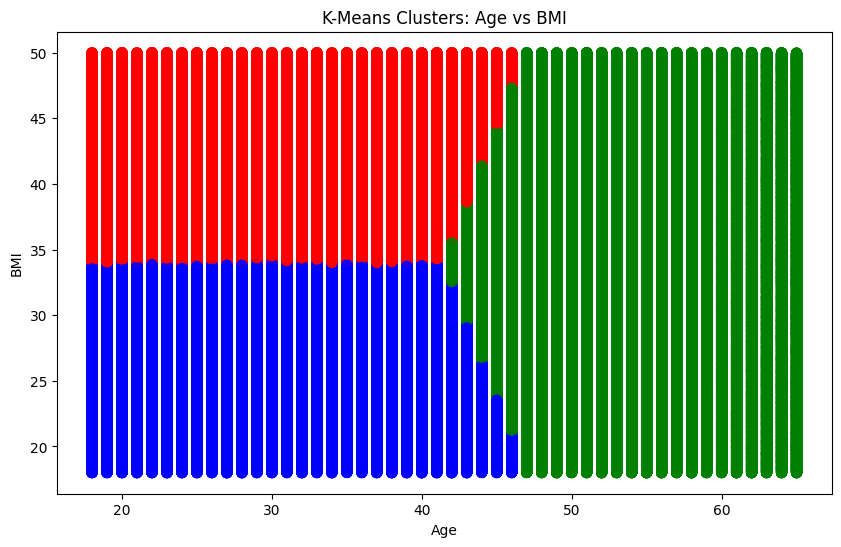

In [ ]:
colors_3cluster = pd.Series(model.labels_).map({0:'red', 1:'blue', 2:'green'})

plt.figure(figsize = (10,6))
plt.scatter(df04.remainder__age, df04.remainder__bmi, c= colors_3cluster, s=50, alpha=0.9)
plt.title('K-Means Clusters: Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

The graph indicates that KMeans clustering can group policyholders into distinct segments based on Age and BMI, suggesting underlying patterns. However, these clusters do not correspond well to the predefined coverage_level categories, highlighting a potential misalignment between the clustering features and the target class.
